# Time Series Analysis w/ OLS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('../Data/ts_sandq.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

In [2]:
#pandas adaptation for forecasting
#future_periods = 12
#forecast_dates = pd.date_range(start=df.index[-1] + pd.offsets.MonthEnd(), periods=future_periods, freq='M')
#forecast_df = pd.DataFrame(forecast, columns=['Forecast'], index=forecast_dates)

,Value
Date,
2000-01-01,50.993428
2000-02-01,54.733471
2000-03-01,59.995631
2000-04-01,63.136060
2000-05-01,58.351947


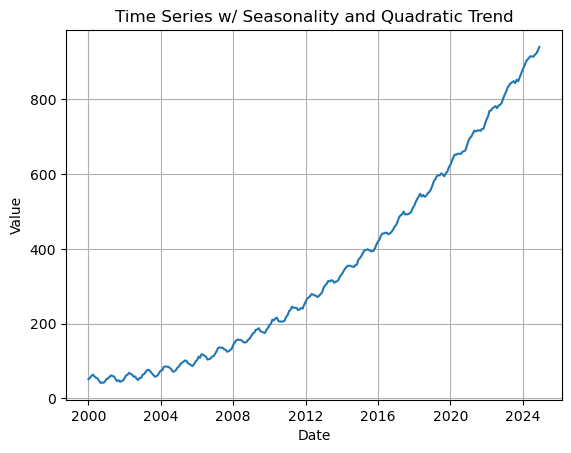

In [65]:
plt.plot(df.index, df['Value'])
plt.title('Time Series w/ Seasonality and Quadratic Trend')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

Date
2000-01-01    0
2000-02-01    1
2000-03-01    2
2000-04-01    3
2000-05-01    4
Name: Linear_Time_Trend, dtype: int64
                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     4399.
Date:                Fri, 26 Jul 2024   Prob (F-statistic):          1.72e-180
Time:                        13:45:00   Log-Likelihood:                -1688.7
No. Observations:                 300   AIC:                             3381.
Df Residuals:                     298   BIC:                             3389.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-

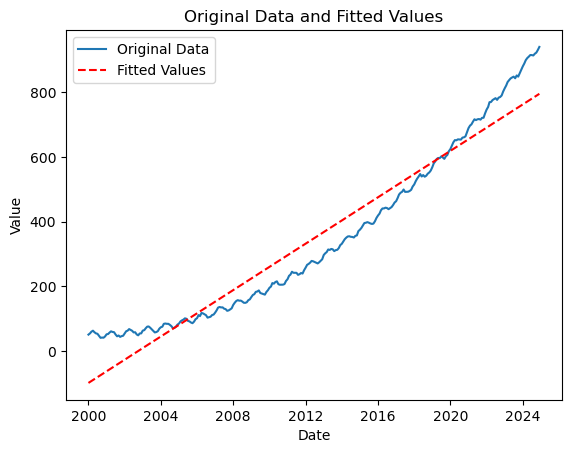

In [96]:
#Linear Trend Model
df['Linear_Time_Trend']= np.arange(len(df))
print(df['Linear_Time_Trend'].head())
linear_model = smf.ols('Value ~ 1 + Linear_Time_Trend', data=df).fit()
print(linear_model.summary())
df['l_yhat'] = linear_model.fittedvalues
df['l_e'] = linear_model.resid

plt.plot(df.index, df['Value'], label='Original Data')
plt.plot(df.index, df['l_yhat'], label='Fitted Values', color='red', linestyle='--')
plt.title('Original Data and Fitted Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

Date
2000-01-01     0
2000-02-01     1
2000-03-01     4
2000-04-01     9
2000-05-01    16
Name: Quadratic_Time_Trend, dtype: int64
                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.035e+05
Date:                Fri, 26 Jul 2024   Prob (F-statistic):               0.00
Time:                        13:45:33   Log-Likelihood:                -1018.9
No. Observations:                 300   AIC:                             2044.
Df Residuals:                     297   BIC:                             2055.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025   

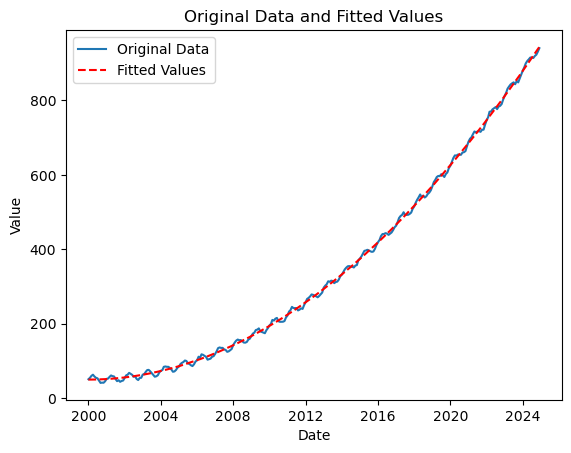

In [98]:
#Quadratic Trend Model
df['Quadratic_Time_Trend'] = df['Linear_Time_Trend'] ** 2
print(df['Quadratic_Time_Trend'].head())
quadratic_model = smf.ols('Value ~ 1 + Linear_Time_Trend + Quadratic_Time_Trend', data=df).fit()
print(quadratic_model.summary())
df['q_yhat'] = quadratic_model.fittedvalues
df['q_e'] = quadratic_model.resid

#Sum of Squared Errors (SSE)
sse = np.sum(np.square(df['q_e']))
print(f'Sum of Squared Errors (SSE): {sse}')

#Mean Absolute Deviation (MAD)
mad = np.mean(np.abs(df['q_e']))
print(f'Mean Absolute Deviation (MAD): {mad}')

plt.plot(df.index, df['Value'], label='Original Data')
plt.plot(df.index, df['q_yhat'], label='Fitted Values', color='red', linestyle='--')
plt.title('Original Data and Fitted Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

Date
2000-01-01    3.931697
2000-02-01    4.002475
2000-03-01    4.094272
2000-04-01    4.145292
2000-05-01    4.066493
Name: Log_Value, dtype: float64
                            OLS Regression Results                            
Dep. Variable:              Log_Value   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 1.740e+04
Date:                Fri, 26 Jul 2024   Prob (F-statistic):          2.39e-266
Time:                        13:16:15   Log-Likelihood:                 208.11
No. Observations:                 300   AIC:                            -412.2
Df Residuals:                     298   BIC:                            -404.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>

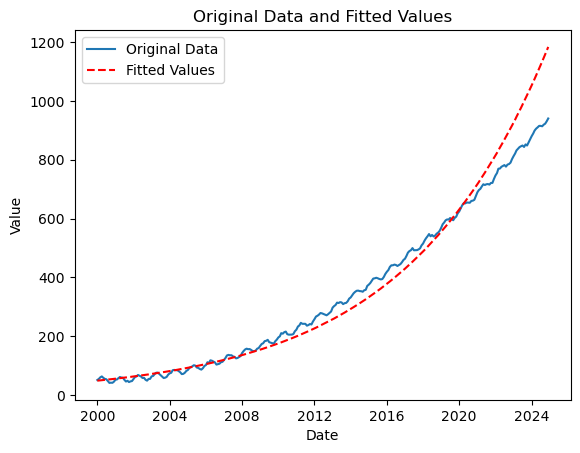

In [46]:
#Exponential Trend Model
df['Log_Value'] = np.log(df['Value'])
print(df['Log_Value'].head())
exponential_model = smf.ols('Log_Value ~ 1 + Linear_Time_Trend', data=df).fit()
print(exponential_model.summary())
df['e_yhat'] = np.exp(exponential_model.fittedvalues) #Exponentiated to get back into original scale
print(df['e_yhat'])

plt.plot(df.index, df['Value'], label='Original Data')
plt.plot(df.index, df['e_yhat'], label='Fitted Values', color='red', linestyle='--')
plt.title('Original Data and Fitted Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

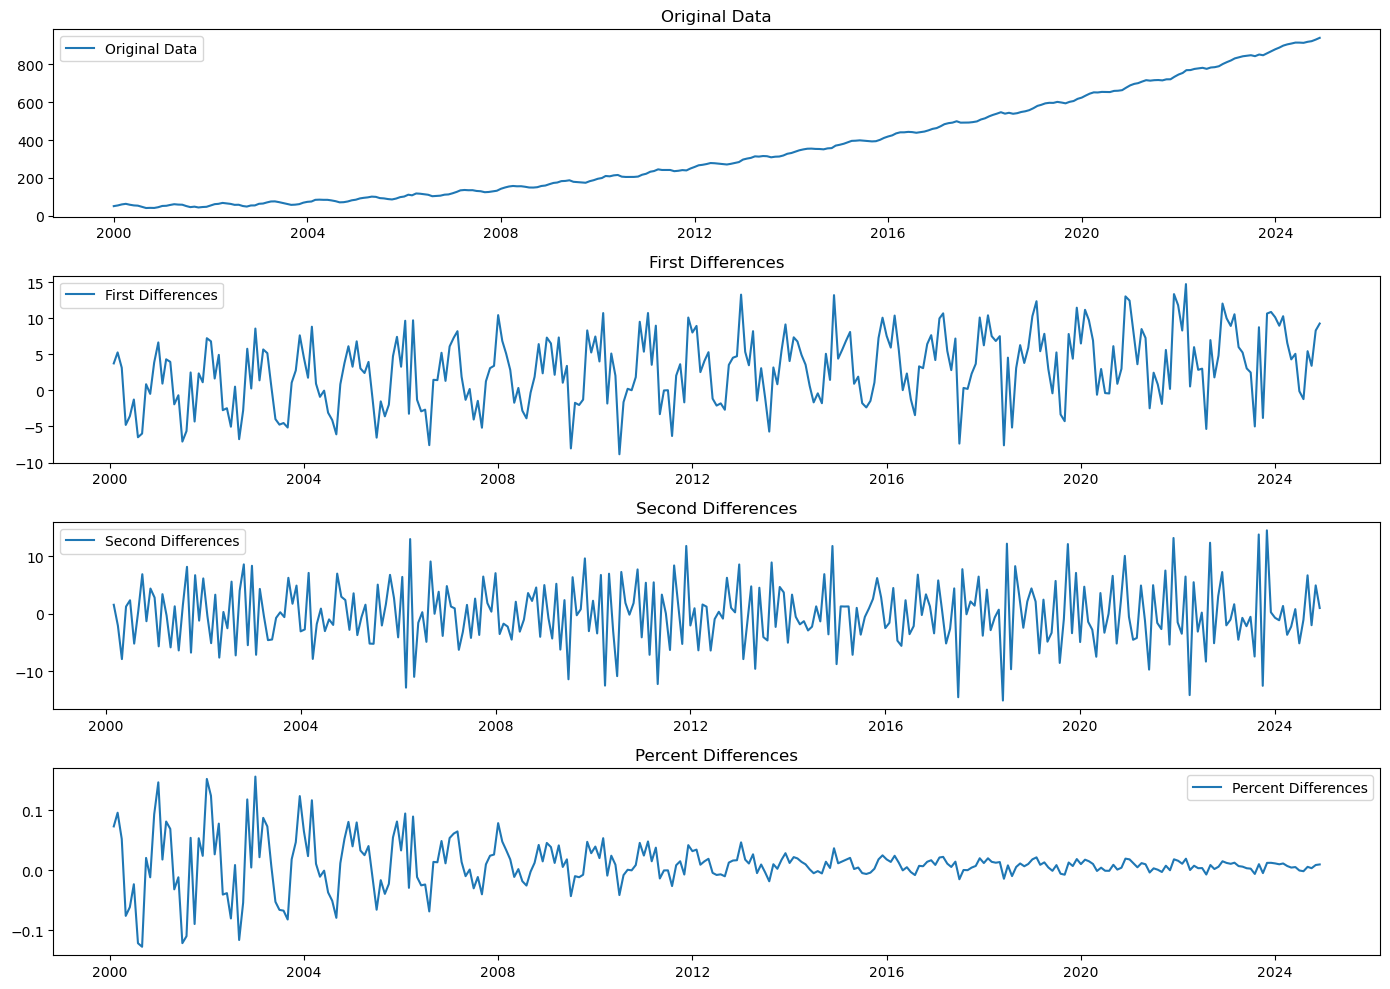

In [48]:
#Selecting Between Models Using Differences
df['Value_First_Diff'] = df['Value'].diff()
df['Value_Second_Diff'] = df['Value_First_Diff'].diff()
df['Value_Percent_Diff'] = df['Value'].pct_change()

plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(df.index, df['Value'], label='Original Data')
plt.title('Original Data')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(df.index, df['Value_First_Diff'], label='First Differences')
plt.title('First Differences')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(df.index, df['Value_Second_Diff'], label='Second Differences')
plt.title('Second Differences')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(df.index, df['Value_Percent_Diff'], label='Percent Differences')
plt.title('Percent Differences')
plt.legend()

plt.tight_layout()
plt.show()

In [112]:
#Sum of Squared Errors (SSE)
sse = np.sum(np.square(df['l_e']))
print(f'Linear Model Sum of Squared Errors (SSE): {sse}')
sse = np.sum(np.square(df['q_e']))
print(f'Quadratic Model Sum of Squared Errors (SSE): {sse}')
print('\n')

#Mean Absolute Deviation (MAD)
mad = np.mean(np.abs(df['l_e']))
print(f'Linear Model Mean Absolute Deviation (MAD): {mad}')
mad = np.mean(np.abs(df['q_e']))
print(f'Quadratic Model Mean Absolute Deviation (MAD): {mad}')
print('\n')

#Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean(np.square(df['l_e'])))
print(f'Linear Model Root Mean Squared Error (RMSE): {rmse}')
rmse = np.sqrt(np.mean(np.square(df['q_e'])))
print(f'Quadratic Model Root Mean Squared Error (RMSE): {rmse}')
print('\n')

#Mean Absolute Percentage Error (MAPE)
#Avoid division by zero by adding a tiny constant to the actual values
epsilon = 1e-10
mape = np.mean(np.abs(df['l_e']) / (df['Value'] + epsilon)) * 100
print(f'Linear Model Mean Absolute Percentage Error (MAPE): {mape:.2f}%')
mape = np.mean(np.abs(df['q_e']) / (df['Value'] + epsilon)) * 100
print(f'Quadratic Model Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

Linear Model Sum of Squared Errors (SSE): 1361637.8779689965
Quadratic Model Sum of Squared Errors (SSE): 15650.954999275138


Linear Model Mean Absolute Deviation (MAD): 57.779090012653626
Quadratic Model Mean Absolute Deviation (MAD): 6.336622094399653


Linear Model Root Mean Squared Error (RMSE): 67.37056424406228
Quadratic Model Root Mean Squared Error (RMSE): 7.222869928053792


Linear Model Mean Absolute Percentage Error (MAPE): 39.96%
Quadratic Model Mean Absolute Percentage Error (MAPE): 4.01%


In [28]:
#Forecasting

#Extend the time index by 12 months
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date, periods=13, freq='M')[1:]  

future_df = pd.DataFrame({
    'Date': future_dates,
    'Linear_Time_Trend': np.arange(len(df), len(df) + len(future_dates)),
    
})

future_df['Quadratic_Time_Trend'] = future_df['Linear_Time_Trend'] ** 2
future_df.set_index('Date', inplace=True)

future_df.head()

,Linear_Time_Trend,Quadratic_Time_Trend
Date,,
2025-01-31,300,90000
2025-02-28,301,90601
2025-03-31,302,91204
2025-04-30,303,91809
2025-05-31,304,92416


In [81]:
future_df['Linear_Forecast'] = linear_model.predict(sm.add_constant(future_df['Linear_Time_Trend']))
future_df['Quadratic_Forecast'] = quadratic_model.predict(sm.add_constant(future_df[['Linear_Time_Trend', 'Quadratic_Time_Trend']]))
future_df['Exponential_Forecast'] = np.exp(exponential_model.predict(sm.add_constant(future_df['Linear_Time_Trend'])))
future_df.tail()

,Linear_Time_Trend,Quadratic_Time_Trend,Linear_Forecast,Quadratic_Forecast,Exponential_Forecast
Date,,,,,
2025-08-31,307,94249,819.239542,992.050256,1289.130277
2025-09-30,308,94864,822.228425,998.194526,1302.958721
2025-10-31,309,95481,825.217307,1004.358767,1316.935503
2025-11-30,310,96100,828.206189,1010.542978,1331.062213
2025-12-31,311,96721,831.195072,1016.747160,1345.340460


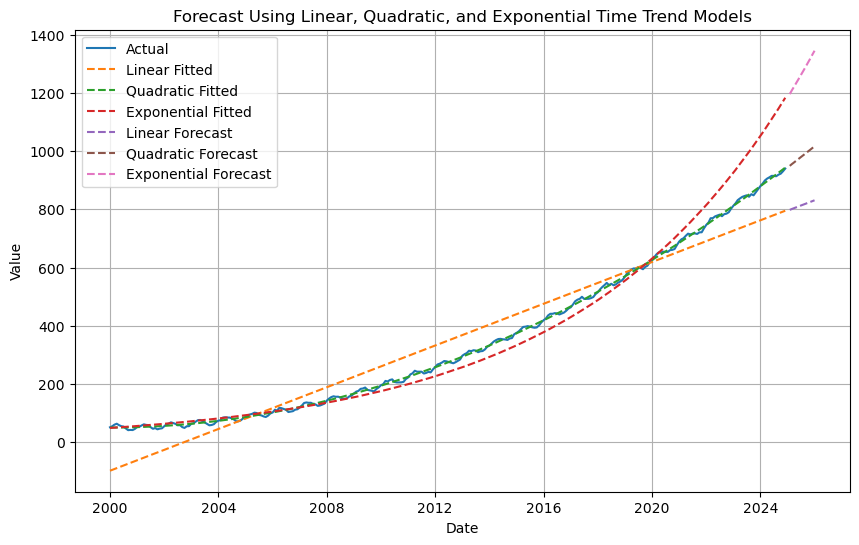

In [87]:
plt.figure(figsize=(10, 6))
plt.plot(df['Value'], label='Actual')
plt.plot(df['l_yhat'], label='Linear Fitted', linestyle='--')
plt.plot(df['q_yhat'], label='Quadratic Fitted', linestyle='--')
plt.plot(df['e_yhat'], label='Exponential Fitted', linestyle='--')

plt.plot(future_df['Linear_Forecast'], label='Linear Forecast', linestyle='--')
plt.plot(future_df['Quadratic_Forecast'], label='Quadratic Forecast', linestyle='--')
plt.plot(future_df['Exponential_Forecast'], label='Exponential Forecast', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Forecast Using Linear, Quadratic, and Exponential Time Trend Models')
plt.legend()
plt.grid(True)
plt.show()

In [77]:
#More Forecasting
bo,b1 = linear_model.params


period = len(df) + input("How many months after the end of the series are you wanting the 

-98.34734432203572